### Create a DataFrame and a CSV file with number of values per ROI  
A Region of interest (ROI) refers to an area on a plane that is expected to contain the projection of a particle track. ROIs can vary in size, ranging from very small to nearly as large as the entire wire plane. While the original files include all hit wires on the plane, the normalized files contain only the values recorded within the ROI. The ROI boundaries were provided by the data owner.

In [3]:
import os
import pandas as pd
import csv
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
norm_dir = 'path/to/norm_files'
class_0_dirs = [f"{norm_dir}/{plane}/ATMO" for plane in range(3)]
class_1_dirs = [f"{norm_dir}/{plane}/PDK" for plane in range(3)]

class_dirs = [class_0_dirs, class_1_dirs]

In [ ]:
# Event information contained in the filename
filename = []
atmo_pdk = []
mc_sim = []
plane = []
event = []

count_ROI_values = []

for class_dir in class_dirs:
    for i in tqdm.tqdm(range(3)):
        for dir, subdirs, files in os.walk(class_dir[i]):
            if dir == class_dir[i]:
                for file in files:
                    file_path = os.path.join(class_dir[i], file)
                    base = os.path.splitext(file)[0]
                    base_sp = base.replace('.extracted', '')
                    base_sp = base_sp.strip().split('_')

                    with open(file_path, "r") as f:
                        line_count = sum(1 for line in f)

                    filename.append(base)
                    atmo_pdk.append(base_sp[1])
                    mc_sim.append(int(base_sp[2]))
                    plane.append(int(base_sp[-2][-1]))
                    event.append(int(base_sp[-1]))
                    count_ROI_values.append(line_count)

In [14]:
dict_values_in_ROI = {
    'filename' : filename,
    'atmonu_or_pdk' : atmo_pdk,
    'MC_sim' : mc_sim,
    'plane' : plane,
    'event' : event,
    'ROI_values_count' : count_ROI_values 
}

print('Created a dictionary that stores the count of values (time-hit wire pairs) for each file.')

In [15]:
df_values_in_ROI = pd.DataFrame(dict_values_in_ROI)
print ('DataFrame created from the dictionary')

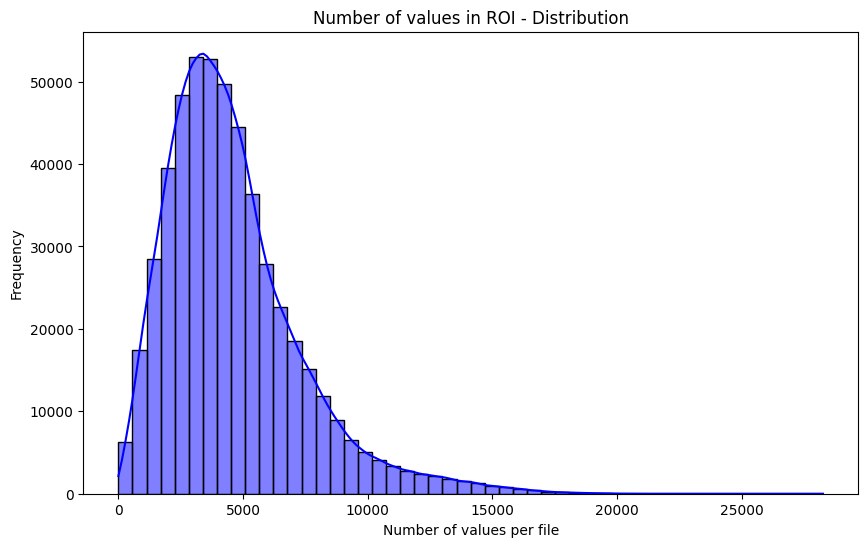

In [18]:
# The distribution of the number of values across all files
plt.figure(figsize=(10, 6))
sns.histplot(df_values_in_ROI['ROI_values_count'], kde=True, bins=50, color='blue', edgecolor='black')
plt.title('Number of values in ROI - Distribution')
plt.xlabel('Number of values per file')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# The distribution of the number of values across files with fewer than 500 values.

In [19]:
mask = df_values_in_ROI['ROI_values_count'] < 500

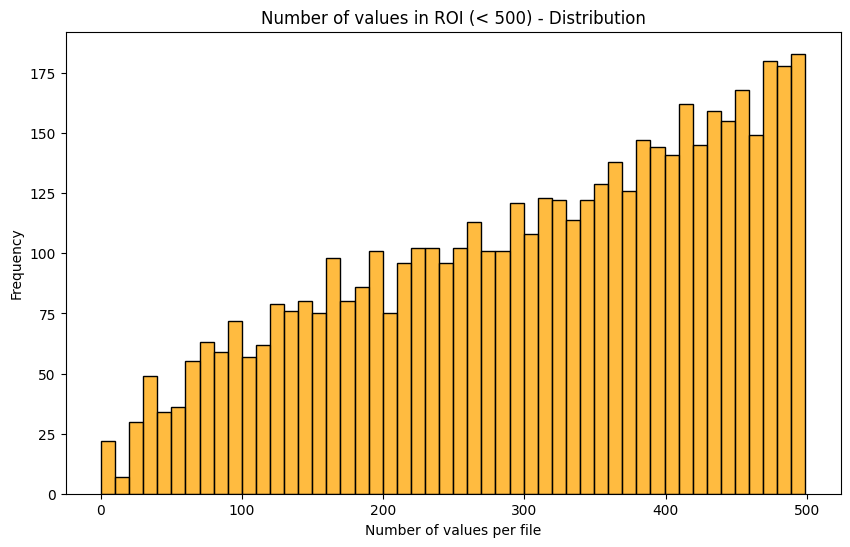

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_values_in_ROI[mask]['ROI_values_count'], bins=50, color='orange', edgecolor='black')
plt.title('Number of values in ROI (< 500) - Distribution')
plt.xlabel('Number of values per file')
plt.ylabel('Frequency')
plt.show()

In [24]:
df_values_in_ROI.to_csv('ROI_values_count_ALL.csv', index=False)
print("DataFrame successfully saved as 'ROI_values_count_ALL.csv'")